In [1]:
#dT2020raw.SUBZONE_N.unique()

In [2]:
#dT20192011 = pd.read_excel('singapore-residents-by-planning-areasubzone-age-group-sex-and-type-of-dwelling-june-20002020.xlsx', header = 2, sheet_name = '2011-2019(Total)')

In [3]:
#dT20192011

In [4]:
#pd.DataFrame(dT20192011.Subzone.unique()) - pd.DataFrame(dT2020raw.SUBZONE_N.unique())

# Obtaining BusStop and MRTStop information
### –––––––––––––––––––––––––––––––––––––––––––––––––––––––––

### Using Geopandas to Import BusStops

In [5]:
import geopandas as gpd
import pandas as pd

In [6]:
#Load into GeoDataFrame
gdf_BusStop = gpd.read_file('BusStop.shp')

In [7]:
gdf_BusStop.head()

,BUS_STOP_N,BUS_ROOF_N,LOC_DESC,geometry
0,78221,B06,BLK 231A CP,POINT (42227.955 39563.156)
1,63359,B01,HOUGANG SWIM CPLX,POINT (34065.748 39047.458)
2,64141,B13,AFT JLN TELAWI,POINT (36335.296 38525.741)
3,83139,B07,AFT JOO CHIAT PL,POINT (36530.265 32981.180)
4,55231,B02,OPP SBST ANG MO KIO DEPOT,POINT (29669.934 40841.514)


<AxesSubplot:>

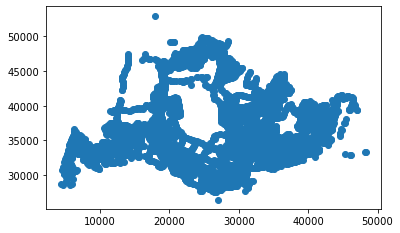

In [8]:
gdf_BusStop.plot()

### Using Geopandas to Import Subzone

In [9]:
#Load into GeoDataFrame
gdf_Subzone = gpd.read_file('MP14_SUBZONE_WEB_PL.shp')

In [10]:
gdf_Subzone.head()

,OBJECTID,SUBZONE_NO,SUBZONE_N,SUBZONE_C,CA_IND,PLN_AREA_N,PLN_AREA_C,REGION_N,REGION_C,INC_CRC,FMEL_UPD_D,X_ADDR,Y_ADDR,SHAPE_Leng,SHAPE_Area,geometry
0,1,1,MARINA SOUTH,MSSZ01,Y,MARINA SOUTH,MS,CENTRAL REGION,CR,5ED7EB253F99252E,2014-12-05,31595.8357,29220.1873,5267.381024,1.630379e+06,"POLYGON ((31495.560 30140.012, 31980.957 29671..."
1,2,1,PEARL'S HILL,OTSZ01,Y,OUTRAM,OT,CENTRAL REGION,CR,8C7149B9EB32EEFC,2014-12-05,28679.0634,29782.0519,3506.107376,5.598162e+05,"POLYGON ((29092.275 30021.888, 29119.641 30006..."
2,3,3,BOAT QUAY,SRSZ03,Y,SINGAPORE RIVER,SR,CENTRAL REGION,CR,C35FEFF02B13E0E5,2014-12-05,29654.9594,29974.6553,1740.925766,1.608075e+05,"POLYGON ((29932.332 29879.120, 29947.317 29858..."
3,4,8,HENDERSON HILL,BMSZ08,N,BUKIT MERAH,BM,CENTRAL REGION,CR,3775D82C5DDBEFBD,2014-12-05,26782.8261,29933.7651,3313.624904,5.954289e+05,"POLYGON ((27131.276 30059.727, 27088.334 29709..."
4,5,3,REDHILL,BMSZ03,N,BUKIT MERAH,BM,CENTRAL REGION,CR,85D9ABEF0A40678F,2014-12-05,26201.9580,30005.7035,2825.594099,3.874294e+05,"POLYGON ((26451.027 30396.458, 26440.474 30361..."


### Left join BusStops with Subzone

In [11]:
from geopandas.tools import sjoin
join_left_df_BusStop = sjoin(gdf_BusStop, gdf_Subzone, how="left")
join_left_df_BusStop

,BUS_STOP_N,BUS_ROOF_N,LOC_DESC,geometry,index_right,OBJECTID,SUBZONE_NO,SUBZONE_N,SUBZONE_C,CA_IND,PLN_AREA_N,PLN_AREA_C,REGION_N,REGION_C,INC_CRC,FMEL_UPD_D,X_ADDR,Y_ADDR,SHAPE_Leng,SHAPE_Area
0,78221,B06,BLK 231A CP,POINT (42227.955 39563.156),245.0,246.0,5.0,PASIR RIS DRIVE,PRSZ05,N,PASIR RIS,PR,EAST REGION,ER,2B73597AF3F174F3,2014-12-05,42032.4580,38988.2187,5311.060366,1.639669e+06
1,63359,B01,HOUGANG SWIM CPLX,POINT (34065.748 39047.458),207.0,208.0,4.0,HOUGANG WEST,HGSZ04,N,HOUGANG,HG,NORTH-EAST REGION,NER,27B0E0BDE3579753,2014-12-05,33849.2205,39506.8724,6424.482139,1.328876e+06
2,64141,B13,AFT JLN TELAWI,POINT (36335.296 38525.741),208.0,209.0,3.0,PAYA LEBAR WEST,PLSZ03,N,PAYA LEBAR,PL,EAST REGION,ER,4BADA58E2612A6E2,2014-12-05,36649.3106,39403.4873,5898.475695,6.098947e+05
3,83139,B07,AFT JOO CHIAT PL,POINT (36530.265 32981.180),166.0,167.0,5.0,FRANKEL,BDSZ05,N,BEDOK,BD,EAST REGION,ER,B34F041CC4B050EC,2014-12-05,37694.5519,33007.2679,8750.386291,4.297141e+06
4,55231,B02,OPP SBST ANG MO KIO DEPOT,POINT (29669.934 40841.514),227.0,228.0,10.0,YIO CHU KANG,AMSZ10,N,ANG MO KIO,AM,NORTH-EAST REGION,NER,5E2B16BB381BAEA4,2014-12-05,29443.7447,40836.0207,4533.218364,9.094186e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5132,24539,B03,DUNDEE MARINE,POINT (8211.954 31924.108),78.0,79.0,5.0,PIONEER SECTOR,PNSZ05,N,PIONEER,PN,WEST REGION,WR,F3241D6C0FEF13ED,2014-12-05,8872.7501,31423.4434,8489.982578,2.796007e+06
5133,46441,B02,BLK 816,POINT (23143.267 47097.652),305.0,306.0,2.0,MIDVIEW,WDSZ02,N,WOODLANDS,WD,NORTH REGION,NR,42D5F52D334C615F,2014-12-05,23349.7600,46841.1143,4159.201440,9.364155e+05
5134,64391,B04,BLK 831,POINT (34273.668 39267.502),242.0,243.0,1.0,HOUGANG CENTRAL,HGSZ01,N,HOUGANG,HG,NORTH-EAST REGION,NER,C4419A9A8D05E0DF,2014-12-05,34470.7005,39076.5963,2759.815466,4.417334e+05
5135,10389,B01,BLK 48,POINT (27156.674 30126.309),6.0,7.0,9.0,BUKIT HO SWEE,BMSZ09,N,BUKIT MERAH,BM,CENTRAL REGION,CR,7839A8577144EFE2,2014-12-05,27680.0627,30230.8610,3275.312488,5.517320e+05


### Filter out relevant rows for BusStop_Subzone

In [12]:
BusStop_Subzone = join_left_df_BusStop.filter(['BUS_STOP_N','SUBZONE_N','PLN_AREA_N', 'REGION_N'], axis=1)
BusStop_Subzone

,BUS_STOP_N,SUBZONE_N,PLN_AREA_N,REGION_N
0,78221,PASIR RIS DRIVE,PASIR RIS,EAST REGION
1,63359,HOUGANG WEST,HOUGANG,NORTH-EAST REGION
2,64141,PAYA LEBAR WEST,PAYA LEBAR,EAST REGION
3,83139,FRANKEL,BEDOK,EAST REGION
4,55231,YIO CHU KANG,ANG MO KIO,NORTH-EAST REGION
...,...,...,...,...
5132,24539,PIONEER SECTOR,PIONEER,WEST REGION
5133,46441,MIDVIEW,WOODLANDS,NORTH REGION
5134,64391,HOUGANG CENTRAL,HOUGANG,NORTH-EAST REGION
5135,10389,BUKIT HO SWEE,BUKIT MERAH,CENTRAL REGION


In [13]:
#BusStop_Subzone_count = BusStop_Subzone.groupby('SUBZONE_N').count()
#BusStop_Subzone_count = BusStop_Subzone_count.filter(['SUBZONE_N', 'BUS_STOP_N'], axis=1)
#BusStop_Subzone_count

### Using Geopandas to Import MRT Stops

In [14]:
#Load into GeoDataFrame
gdf_MRTStop = gpd.read_file('MRTLRTStnPtt.shp')

In [15]:
gdf_MRTStop.head()

,OBJECTID,STN_NAME,STN_NO,geometry
0,1,EUNOS MRT STATION,EW7,POINT (35782.955 33560.078)
1,2,CHINESE GARDEN MRT STATION,EW25,POINT (16790.747 36056.302)
2,3,KHATIB MRT STATION,NS14,POINT (27962.311 44352.568)
3,4,KRANJI MRT STATION,NS7,POINT (20081.697 45214.548)
4,5,REDHILL MRT STATION,EW18,POINT (26163.478 30218.820)


<AxesSubplot:>

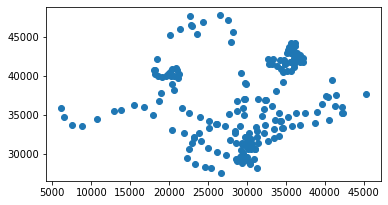

In [16]:
gdf_MRTStop.plot()

### Left join MRTStops with Subzone

In [17]:
from geopandas.tools import sjoin
join_left_df_MRTStop = sjoin(gdf_MRTStop, gdf_Subzone, how="left")
join_left_df_MRTStop
# Note the NaNs where the point did not intersect a boro

,OBJECTID_left,STN_NAME,STN_NO,geometry,index_right,OBJECTID_right,SUBZONE_NO,SUBZONE_N,SUBZONE_C,CA_IND,PLN_AREA_N,PLN_AREA_C,REGION_N,REGION_C,INC_CRC,FMEL_UPD_D,X_ADDR,Y_ADDR,SHAPE_Leng,SHAPE_Area
0,1,EUNOS MRT STATION,EW7,POINT (35782.955 33560.078),169,170,5,GEYLANG EAST,GLSZ05,N,GEYLANG,GL,CENTRAL REGION,CR,58687154BD252A0A,2014-12-05,35237.1681,33246.0587,7028.340071,2.579087e+06
1,2,CHINESE GARDEN MRT STATION,EW25,POINT (16790.747 36056.302),146,147,4,LAKESIDE,JESZ04,N,JURONG EAST,JE,WEST REGION,WR,3BBFD45071B70ECF,2014-12-05,16697.0118,35114.9062,8828.633830,3.108023e+06
2,3,KHATIB MRT STATION,NS14,POINT (27962.311 44352.568),316,317,8,KHATIB,YSSZ08,N,YISHUN,YS,NORTH REGION,NR,DC75517DA31123DB,2014-12-05,27480.6357,44420.6884,4956.145735,1.432913e+06
3,4,KRANJI MRT STATION,NS7,POINT (20081.697 45214.548),280,281,2,TURF CLUB,SKSZ02,N,SUNGEI KADUT,SK,NORTH REGION,NR,17459E60C3EEAF30,2014-12-05,20234.6006,44507.1901,7665.676019,3.291406e+06
4,5,REDHILL MRT STATION,EW18,POINT (26163.478 30218.820),4,5,3,REDHILL,BMSZ03,N,BUKIT MERAH,BM,CENTRAL REGION,CR,85D9ABEF0A40678F,2014-12-05,26201.9580,30005.7035,2825.594099,3.874294e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,189,TELOK BLANGAH MRT STATION,CC28,POINT (25376.847 28138.967),23,24,1,MARITIME SQUARE,BMSZ01,N,BUKIT MERAH,BM,CENTRAL REGION,CR,C1AC31ABF9978DDB,2014-12-05,25805.7867,27911.4193,13737.116181,2.701634e+06
181,190,TELOK AYER MRT STATION,DT18,POINT (29667.622 29414.587),35,36,3,CHINATOWN,OTSZ03,Y,OUTRAM,OT,CENTRAL REGION,CR,0FF1661344C84AED,2014-12-05,29153.9676,29158.0443,4297.599910,5.872227e+05
182,191,NEWTON MRT STATION,NS21,POINT (28519.362 32735.207),120,121,3,NEWTON CIRCUS,NTSZ03,Y,NEWTON,NT,CENTRAL REGION,CR,8B2F19EEE51EDA60,2014-12-05,28587.1626,32653.9428,2399.407300,2.135816e+05
183,0,CANBERRA MRT STATION,NS12,POINT (27598.622 47200.242),307,308,2,SEMBAWANG SPRINGS,SBSZ02,N,SEMBAWANG,SB,NORTH REGION,NR,C739B507A1ACBDB3,2014-12-05,27076.8118,46959.0886,4212.042247,1.099395e+06


### Filter out relevant rows for MRTStop_Subzone

In [18]:
MRTStop_Subzone = join_left_df_MRTStop.filter(['STN_NAME', 'STN_NO', 'SUBZONE_N', 'PLN_AREA_N', 'REGION_N'], axis=1)
MRTStop_Subzone

,STN_NAME,STN_NO,SUBZONE_N,PLN_AREA_N,REGION_N
0,EUNOS MRT STATION,EW7,GEYLANG EAST,GEYLANG,CENTRAL REGION
1,CHINESE GARDEN MRT STATION,EW25,LAKESIDE,JURONG EAST,WEST REGION
2,KHATIB MRT STATION,NS14,KHATIB,YISHUN,NORTH REGION
3,KRANJI MRT STATION,NS7,TURF CLUB,SUNGEI KADUT,NORTH REGION
4,REDHILL MRT STATION,EW18,REDHILL,BUKIT MERAH,CENTRAL REGION
...,...,...,...,...,...
180,TELOK BLANGAH MRT STATION,CC28,MARITIME SQUARE,BUKIT MERAH,CENTRAL REGION
181,TELOK AYER MRT STATION,DT18,CHINATOWN,OUTRAM,CENTRAL REGION
182,NEWTON MRT STATION,NS21,NEWTON CIRCUS,NEWTON,CENTRAL REGION
183,CANBERRA MRT STATION,NS12,SEMBAWANG SPRINGS,SEMBAWANG,NORTH REGION


### EXAMPLE: MRT Stops by tap-in tap-out volume

In [19]:
MRTStop_TITO = pd.read_csv('2.8_transport_node_train_202101.csv')    
sum_column = MRTStop_TITO["TOTAL_TAP_IN_VOLUME"] + MRTStop_TITO["TOTAL_TAP_OUT_VOLUME"]
MRTStop_TITO["TOTAL_TAP_VOLUME"] = sum_column
MRTStop_TITO = MRTStop_TITO.filter(['PT_CODE', 'TOTAL_TAP_VOLUME'], axis=1)
MRTStop_TITO = MRTStop_TITO.groupby('PT_CODE')['TOTAL_TAP_VOLUME'].sum()
MRTStop_TITO

PT_CODE
BP10    183991
BP11    165351
BP12    126103
BP13     65108
BP2     151841
         ...  
SW6     171376
SW7     127504
SW8     101888
TE1      98724
TE3     141889
Name: TOTAL_TAP_VOLUME, Length: 159, dtype: int64

### EXAMPLE: Merge MRT Stops by tap-in tap-out volume with MRTStop_Subzone

In [20]:
testing = pd.merge(MRTStop_Subzone, MRTStop_TITO, how='inner', left_on = 'STN_NO', right_on = 'PT_CODE', validate='many_to_many')
testing.head(10)

,STN_NAME,STN_NO,SUBZONE_N,PLN_AREA_N,REGION_N,TOTAL_TAP_VOLUME
0,EUNOS MRT STATION,EW7,GEYLANG EAST,GEYLANG,CENTRAL REGION,642053
1,CHINESE GARDEN MRT STATION,EW25,LAKESIDE,JURONG EAST,WEST REGION,406676
2,KHATIB MRT STATION,NS14,KHATIB,YISHUN,NORTH REGION,1448844
3,KRANJI MRT STATION,NS7,TURF CLUB,SUNGEI KADUT,NORTH REGION,262221
4,REDHILL MRT STATION,EW18,REDHILL,BUKIT MERAH,CENTRAL REGION,766934
5,YEW TEE MRT STATION,NS5,YEW TEE,CHOA CHU KANG,WEST REGION,1410006
6,PIONEER MRT STATION,EW28,JURONG WEST CENTRAL,JURONG WEST,WEST REGION,1190585
7,COMMONWEALTH MRT STATION,EW20,COMMONWEALTH,QUEENSTOWN,CENTRAL REGION,640451
8,SIMEI MRT STATION,EW3,SIMEI,TAMPINES,EAST REGION,769284
9,ADMIRALTY MRT STATION,NS10,WOODLANDS EAST,WOODLANDS,NORTH REGION,2150081


### EXAMPLE: Number of MRT Stops by Subzone

In [21]:
MRTStop_Subzone_count = testing.groupby('SUBZONE_N').count()
MRTStop_Subzone_count = MRTStop_Subzone_count.rename(columns={'STN_NAME': 'STN_NUM'})
MRTStop_Subzone_count = MRTStop_Subzone_count.filter(['SUBZONE_N', 'STN_NUM'], axis=1)
MRTStop_Subzone_count

,STN_NUM
SUBZONE_N,
ALJUNIED,3
ANAK BUKIT,1
ANCHORVALE,3
BANGKIT,2
BEDOK NORTH,1
...,...
WOODLANDS SOUTH,1
WOODLANDS WEST,1
YEW TEE,1


### EXAMPLE: Filter 'testing' and groupby SUBZONE

In [22]:
MRTStop_testing = testing.filter(['SUBZONE_N', 'TOTAL_TAP_VOLUME', 'STN_NUM'], axis=1)
MRTStop_testing = MRTStop_testing.groupby('SUBZONE_N')['TOTAL_TAP_VOLUME'].sum()
MRTStop_testing

SUBZONE_N
ALJUNIED           1489384
ANAK BUKIT          538115
ANCHORVALE          364099
BANGKIT             232430
BEDOK NORTH        1460136
                    ...   
WOODLANDS SOUTH     141889
WOODLANDS WEST     1005198
YEW TEE            1410006
YIO CHU KANG       1043477
YISHUN WEST        2484007
Name: TOTAL_TAP_VOLUME, Length: 102, dtype: int64

### EXAMPLE: Merge MRTStop_testing and MRTStop_Subzone_count datasets

In [23]:
MRTStop_testing = pd.merge(MRTStop_testing, MRTStop_Subzone_count, how='inner', on = 'SUBZONE_N', validate='many_to_many')
MRTStop_testing

,TOTAL_TAP_VOLUME,STN_NUM
SUBZONE_N,,
ALJUNIED,1489384,3
ANAK BUKIT,538115,1
ANCHORVALE,364099,3
BANGKIT,232430,2
BEDOK NORTH,1460136,1
...,...,...
WOODLANDS SOUTH,141889,1
WOODLANDS WEST,1005198,1
YEW TEE,1410006,1


# Subzone Demographics Data (Shihan)
### –––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––

In [60]:
dT2020raw = pd.read_excel('singapore-residents-by-planning-areasubzone-age-group-sex-and-type-of-dwelling-june-20002020.xlsx', header = 2, sheet_name = '2020(Total)'); x = 69840
dT2020raw = dT2020raw.rename(columns={'Subzone': 'SUBZONE_N'})
dT2020raw['SUBZONE_N'] = dT2020raw['SUBZONE_N'].str.upper()
dT2020raw = dT2020raw[:x]
dT2020raw = dT2020raw[dT2020raw['SUBZONE_N'] != 'TOTAL']
dT2020raw.filter(['SUBZONE_N', 'Age Group', 'Type of Dwelling', '2020'], axis=1)
dT2020raw.head(10)

,Planning Area,SUBZONE_N,Age Group,Type of Dwelling,2020
360,Ang Mo Kio,ANG MO KIO TOWN CENTRE,Total,Total,4810
361,Ang Mo Kio,ANG MO KIO TOWN CENTRE,Total,Total HDB^,2830
362,Ang Mo Kio,ANG MO KIO TOWN CENTRE,Total,1- and 2-Room Flats*,-
363,Ang Mo Kio,ANG MO KIO TOWN CENTRE,Total,3-Room Flats,400
364,Ang Mo Kio,ANG MO KIO TOWN CENTRE,Total,4-Room Flats,630
365,Ang Mo Kio,ANG MO KIO TOWN CENTRE,Total,5-Room and Executive Flats,1800
366,Ang Mo Kio,ANG MO KIO TOWN CENTRE,Total,Condominiums and Other Apartments,1950
367,Ang Mo Kio,ANG MO KIO TOWN CENTRE,Total,Landed Properties,-
368,Ang Mo Kio,ANG MO KIO TOWN CENTRE,Total,Others,30
369,Ang Mo Kio,ANG MO KIO TOWN CENTRE,0 - 4,Total,170


In [78]:
listOfSubzones = dT2020raw.SUBZONE_N.unique()
listOfSubzones

array(['ANG MO KIO TOWN CENTRE', 'CHENG SAN', 'CHONG BOON', 'KEBUN BAHRU',
       'SEMBAWANG HILLS', 'SHANGRI-LA', 'TAGORE', 'TOWNSVILLE',
       'YIO CHU KANG', 'YIO CHU KANG EAST', 'YIO CHU KANG NORTH',
       'YIO CHU KANG WEST', 'BAYSHORE', 'BEDOK NORTH', 'BEDOK RESERVOIR',
       'BEDOK SOUTH', 'FRANKEL', 'KAKI BUKIT', 'KEMBANGAN', 'SIGLAP',
       'BISHAN EAST', 'MARYMOUNT', 'UPPER THOMSON', 'LIU FANG', 'SAMULUN',
       'SHIPYARD', 'TUKANG', 'BRICKWORKS', 'BUKIT BATOK CENTRAL',
       'BUKIT BATOK EAST', 'BUKIT BATOK SOUTH', 'BUKIT BATOK WEST',
       'GOMBAK', 'GUILIN', 'HILLVIEW', 'HONG KAH NORTH', 'ALEXANDRA HILL',
       'ALEXANDRA NORTH', 'BUKIT HO SWEE', 'BUKIT MERAH',
       'CITY TERMINALS', 'DEPOT ROAD', 'EVERTON PARK', 'HENDERSON HILL',
       'KAMPONG TIONG BAHRU', 'MARITIME SQUARE', 'REDHILL',
       'SINGAPORE GENERAL HOSPITAL', 'TELOK BLANGAH DRIVE',
       'TELOK BLANGAH RISE', 'TELOK BLANGAH WAY', 'TIONG BAHRU',
       'TIONG BAHRU STATION', 'BANGKIT', 'DAIRY FAR

### Extracting Age Groups

In [107]:
dT2020raw_age = dT2020raw[dT2020raw['Type of Dwelling'] == 'Total']
dT2020raw_age = dT2020raw_age.filter(['SUBZONE_N', 'Age Group', '2020'], axis=1)
dT2020raw_age = dT2020raw_age[dT2020raw_age['Age Group'] != 'Total']
dT2020raw_age['2020'] = dT2020raw_age['2020'].replace({'-': 0}).astype(int)
dT2020raw_age = dT2020raw_age.rename(columns={'SUBZONE_N': 'idx'})
dT2020raw_age['Age Group'] = dT2020raw_age['Age Group'].replace(['0 - 4', '5 - 9'],['00 - 04', '05 - 09'])
dT2020raw_age = pd.pivot(dT2020raw_age.assign(idx = dT2020raw_age.groupby('Age Group').cumcount()),
               index='idx',
               columns='Age Group')
#fiveToNineColumn = dT2020raw_age['2020'].drop('5-9')
#dT2020raw_age.insert(0, '5-9', fiveToNineColumn, True)
dT2020raw_age.insert(0, 'SUBZONE_N', listOfSubzones, True)
dT2020raw_age.head(30)


SUBZONE_N    2020                                  \
Age Group                         00 - 04 05 - 09 10 - 14 15 - 19 20 - 24   
idx                                                                         
0          ANG MO KIO TOWN CENTRE     170     240     280     320     270   
1                       CHENG SAN    1060    1040    1040    1160    1330   
2                      CHONG BOON     860     840    1010    1060    1310   
3                     KEBUN BAHRU     660     810     950    1010    1170   
4                 SEMBAWANG HILLS     210     310     400     460     500   
5                      SHANGRI-LA     550     560     640     710     860   
6                          TAGORE     210     310     400     450     580   
7                      TOWNSVILLE     660     860     930     820     890   
8                    YIO CHU KANG       0       0       0       0       0   
9               YIO CHU KANG EAST     160     170     200     260     310   
10             YIO CHU KANG NORTH       0       0       0       0       0   
11              YIO CHU KANG WEST     750     950    1190    1350    1460   
12                       BAYSHORE     340     490     480     450     360   
13                    BEDOK NORTH    2710    3080    3440    4000    4760   
14                BEDOK RESERVOIR    1100    1270    1400    1510    1490   
15                    BEDOK SOUTH    1430    1730    2120    2300    2740   
16                        FRANKEL    1460    2060    2060    1810    1820   
17                     KAKI BUKIT    1200    1250    1580    1930    2510   
18                      KEMBANGAN    1410    1360    1480    1780    2020   
19                         SIGLAP     160     250     260     310     360   
20                    BISHAN EAST     870    1130    1300    1380    1470   
21                      MARYMOUNT    1010    1340    1540    1680    2030   
22                  UPPER THOMSON     910    1260    1450    1560    1740   
23                       LIU FANG       0       0       0       0       0   
24                        SAMULUN       0       0       0       0       0   
25                       SHIPYARD       0       0       0       0       0   
26                         TUKANG       0       0       0       0       0   
27                     BRICKWORKS    2710    1200     850     730     660   
28            BUKIT BATOK CENTRAL    1310    1230    1340    1490    1560   
29               BUKIT BATOK EAST     340     340     540     600     810   

                                                                           \
Age Group 25 - 29 30 - 34 35 - 39 40 - 44 45 - 49 50 - 54 55 - 59 60 - 64   
idx                                                                         
0             280     290     330     400     470     370     320     300   
1            1710    2000    2150    2070    2200    2050    2120    2120   
2            1610    1890    1730    1800    1820    1900    2090    2140   
3            1420    1410    1450    1620    1790    1710    1800    1750   
4             500     350     310     370     550     540     550     480   
5             980    1020     990    1010    1210    1200    1390    1270   
6             670     490     340     440     580     580     670     730   
7            1310    1400    1410    1650    1560    1360    1580    1660   
8               0       0       0       0       0       0       0       0   
9             320     230     240     260     320     290     330     380   
10              0       0       0       0       0       0       0       0   
11           1540    1400    1480    1720    1910    1850    1950    1910   
12            310     360     550     770     860     650     510     400   
13           5620    5280    5100    5670    5960    6030    6950    6560   
14           1600    1830    1900    2090    2110    1920    1840    1800   
15           3130    2920    2700    3050    3490    3430    3730    3740   
16           2050  

### Extracting Type of Dwelling & Income

In [134]:
dT2020raw_dwelling = dT2020raw[dT2020raw['Age Group'] == 'Total']
dT2020raw_dwelling = dT2020raw_dwelling.filter(['SUBZONE_N', 'Type of Dwelling', '2020'], axis=1)
dT2020raw_dwelling = dT2020raw_dwelling[dT2020raw_dwelling['Type of Dwelling'] != 'Total HDB^']
dT2020raw_dwelling['2020'] = dT2020raw_dwelling['2020'].replace({'-': 0}).astype(int)
dT2020raw_dwelling = dT2020raw_dwelling[dT2020raw_dwelling['Type of Dwelling'] != 'Others']
dT2020raw_dwelling = dT2020raw_dwelling.rename(columns={'SUBZONE_N': 'idx'})
print(type(dT2020raw_dwelling.iloc[0]))
dT2020raw_dwelling = pd.pivot(dT2020raw_dwelling.assign(idx = dT2020raw_dwelling.groupby('Type of Dwelling').cumcount()),
               index='idx',
               columns='Type of Dwelling')
dT2020raw_dwelling.insert(0, "SUBZONE_N", listOfSubzones, True)
dT2020raw_dwelling.head(10)

<class 'pandas.core.series.Series'>


SUBZONE_N                 2020               \
Type of Dwelling                         1- and 2-Room Flats* 3-Room Flats   
idx                                                                          
0                 ANG MO KIO TOWN CENTRE                    0          400   
1                              CHENG SAN                  970        13290   
2                             CHONG BOON                 1470        12180   
3                            KEBUN BAHRU                 1590        10240   
4                        SEMBAWANG HILLS                    0            0   
5                             SHANGRI-LA                 2680         6070   
6                                 TAGORE                    0            0   
7                             TOWNSVILLE                 1350         6450   
8                           YIO CHU KANG                    0            0   
9                      YIO CHU KANG EAST                    0            0   

                                                          \
Type of Dwelling 4-Room Flats 5-Room and Executive Flats   
idx                                                        
0                         630                       1800   
1                        8810                       4900   
2                        8560                       3790   
3                        5620                       2170   
4                           0                          0   
5                        5140                       1730   
6                           0                          0   
7                        9440                       3850   
8                           0                          0   
9                           0                          0   

                                                                             
Type of Dwelling Condominiums and Other Apartments Landed Properties  Total  
idx                                                                          
0                                             1950                 0   4810  
1                                                0                 0  28070  
2                                                0                 0  26500  
3                                             1670              1100  22620  
4                                              280              6500   6850  
5                                                0               280  15960  
6                                             2510              5260   7950  
7                                                0                 0  21140  
8                                                0                 0     20  
9                                             1820              2280   4200

In [133]:
#print(type(dT2020raw_dwelling['2020']['Total']))
#for i in dT2020raw_dwelling['2020']:
#    dT2020raw_dwelling['2020']['Total2'] = dT2020raw_dwelling['2020'].apply(lambda row: row.sum(), axis=1)
#dT2020raw_dwelling.head(20)

<class 'pandas.core.series.Series'>


<ipython-input-133-7f6b5442ba1f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dT2020raw_dwelling['2020']['1- and 2-Room Flats*'] = dT2020raw_dwelling['2020'].apply(lambda row: row.sum(), axis=1)


SUBZONE_N                 2020               \
Type of Dwelling                         1- and 2-Room Flats* 3-Room Flats   
idx                                                                          
0                 ANG MO KIO TOWN CENTRE                    0          400   
1                              CHENG SAN                  970        13290   
2                             CHONG BOON                 1470        12180   
3                            KEBUN BAHRU                 1590        10240   
4                        SEMBAWANG HILLS                    0            0   
5                             SHANGRI-LA                 2680         6070   
6                                 TAGORE                    0            0   
7                             TOWNSVILLE                 1350         6450   
8                           YIO CHU KANG                    0            0   
9                      YIO CHU KANG EAST                    0            0   
10                    YIO CHU KANG NORTH                    0            0   
11                     YIO CHU KANG WEST                 2660         7280   
12                              BAYSHORE                    0            0   
13                           BEDOK NORTH                 4460        30850   
14                       BEDOK RESERVOIR                    0         2840   
15                           BEDOK SOUTH                 1510         7920   
16                               FRANKEL                    0            0   
17                            KAKI BUKIT                  480         5900   
18                             KEMBANGAN                 3180         7200   
19                                SIGLAP                    0            0   

                                                          \
Type of Dwelling 4-Room Flats 5-Room and Executive Flats   
idx                                                        
0                         630                       1800   
1                        8810                       4900   
2                        8560                       3790   
3                        5620                       2170   
4                           0                          0   
5                        5140                       1730   
6                           0                          0   
7                        9440                       3850   
8                           0                          0   
9                           0                          0   
10                          0                          0   
11                       4830                       3140   
12                          0                          0   
13                      25570                      10690   
14                       8320                       6270   
15                      11540                       6750   
16                          0                          0   
17                      14590                      14420   
18                       6290                       6840   
19                          0                          0   

                                                                             
Type of Dwelling Condominiums and Other Apartments Landed Properties  Total  
idx                                                                          
0                                             1950                 0   4810  
1                                                0                 0  28070  
2                                                0                 0  26500  
3                                             1670              1100  22620  
4                                              280              6500   6850  
5                                                0               280  15960  
6                                             2510              5260   7950  
7                                                0                 0  21140

In [129]:
incomeRaw = pd.read_csv('average-mhi-from-each-source-by-type-of-dwelling.csv')
incomeDict = {}

#1- and 2-Room Flats*
oneAndTwo = incomeRaw.loc[incomeRaw['level_1'] == 'HDB Dwellings - 1- & 2-Room Flats']
oneAndTwoTotal = oneAndTwo.loc[incomeRaw['level_2'] == 'Total']
incomeDict['1- and 2-Room Flats*'] = int(oneAndTwoTotal['value'])

#3-Room Flats
three = incomeRaw.loc[incomeRaw['level_1'] == 'HDB Dwellings - 3-Room Flats']
threeTotal = three.loc[incomeRaw['level_2'] == 'Total']
incomeDict['3-Room Flats'] = int(threeTotal['value'])

#4-Room Flats
four = incomeRaw.loc[incomeRaw['level_1'] == 'HDB Dwellings - 4-Room Flats']
fourTotal = four.loc[incomeRaw['level_2'] == 'Total']
incomeDict['4-Room Flats'] = int(fourTotal['value'])

#5-Room and Executive Flats
fiveAndExec = incomeRaw.loc[incomeRaw['level_1'] == 'HDB Dwellings - 5-Room & Executive Flats']
fiveAndExecTotal = fiveAndExec.loc[incomeRaw['level_2'] == 'Total']
incomeDict['5-Room and Executive Flats'] = int(fiveAndExecTotal['value'])

#Condominiums and Other Apartments
condoAndApart = incomeRaw.loc[incomeRaw['level_1'] == 'Condominiums & Other Apartments']
condoAndApartTotal = condoAndApart.loc[incomeRaw['level_2'] == 'Total']
incomeDict['Condominiums and Other Apartments'] = int(condoAndApartTotal['value'])

#Landed Properties
landed = incomeRaw.loc[incomeRaw['level_1'] == 'Landed Properties']
landedTotal = landed.loc[incomeRaw['level_2'] == 'Total']
incomeDict['Landed Properties'] = int(landedTotal['value'])

incomeDict

{'1- and 2-Room Flats*': 1906,
 '3-Room Flats': 5130,
 '4-Room Flats': 8088,
 '5-Room and Executive Flats': 11044,
 'Condominiums and Other Apartments': 20536,
 'Landed Properties': 26058}

In [25]:
#dT201119raw = pd.read_excel('singapore-residents-by-planning-areasubzone-age-group-sex-and-type-of-dwelling-june-20002020.xlsx', header = 2, sheet_name = '2011-2019(Total)'); y = 68219
#dT201119raw = dT201119raw.rename(columns={'Subzone': 'SUBZONE_N'})
#dT201119raw['SUBZONE_N'] = dT201119raw['SUBZONE_N'].str.upper()
#dT201119raw = dT201119raw[:y]
#dT201119raw.head(10)

,Planning Area,SUBZONE_N,Age Group,Type of Dwelling,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Total,TOTAL,Total,Total,3789250,3818210,3844750,3870740,3902690,3933560,3965800,3994280,4026210
1,Total,TOTAL,Total,Total HDB^,3120820,3136920,3147630,3154690,3162360,3162640,3156580,3149250,3154520
2,Total,TOTAL,Total,1- and 2-Room Flats*,122470,132210,143450,151720,159790,163850,168050,170960,173770
3,Total,TOTAL,Total,3-Room Flats,629210,621570,612100,609830,604580,599420,590810,584820,580230
4,Total,TOTAL,Total,4-Room Flats,1283520,1294680,1303960,1311750,1320290,1325540,1330160,1331440,1337740
5,Total,TOTAL,Total,5-Room and Executive Flats,1077240,1080230,1081220,1077660,1074740,1070980,1067560,1062030,1062780
6,Total,TOTAL,Total,Condominiums and Other Apartments,383260,393720,407450,425990,453000,484540,525580,562230,587860
7,Total,TOTAL,Total,Landed Properties,247560,249550,251350,252810,251080,250750,249410,248240,249080
8,Total,TOTAL,Total,Others,37620,38010,38320,37240,36250,35630,34230,34570,34750
9,Total,TOTAL,0 - 4,Total,188250,186670,183300,181370,183580,187160,187650,185530,185360


In [27]:
dT2020 = dT2020raw.filter(['SUBZONE_N', 'Age Group', 'Type of Dwelling', '2020'], axis=1)
MRT_relevant_subzones = MRTStop_Subzone.SUBZONE_N.unique()
dT2020finalMRT = dT2020[dT2020['SUBZONE_N'].isin(MRT_relevant_subzones)]
print(dT2020finalMRT.head(10))
MRT_halfcombined = pd.merge(MRTStop_Subzone, dT2020finalMRT, how='inner', on='SUBZONE_N', validate='many_to_many')
MRT_halfcombined.head(10)

     SUBZONE_N Age Group                   Type of Dwelling   2020
540  CHENG SAN     Total                              Total  28070
541  CHENG SAN     Total                         Total HDB^  27970
542  CHENG SAN     Total               1- and 2-Room Flats*    970
543  CHENG SAN     Total                       3-Room Flats  13290
544  CHENG SAN     Total                       4-Room Flats   8810
545  CHENG SAN     Total         5-Room and Executive Flats   4900
546  CHENG SAN     Total  Condominiums and Other Apartments      -
547  CHENG SAN     Total                  Landed Properties      -
548  CHENG SAN     Total                             Others    100
549  CHENG SAN     0 - 4                              Total   1060


,STN_NAME,STN_NO,SUBZONE_N,PLN_AREA_N,REGION_N,Age Group,Type of Dwelling,2020
0,EUNOS MRT STATION,EW7,GEYLANG EAST,GEYLANG,CENTRAL REGION,Total,Total,29920
1,EUNOS MRT STATION,EW7,GEYLANG EAST,GEYLANG,CENTRAL REGION,Total,Total HDB^,18700
2,EUNOS MRT STATION,EW7,GEYLANG EAST,GEYLANG,CENTRAL REGION,Total,1- and 2-Room Flats*,1950
3,EUNOS MRT STATION,EW7,GEYLANG EAST,GEYLANG,CENTRAL REGION,Total,3-Room Flats,6250
4,EUNOS MRT STATION,EW7,GEYLANG EAST,GEYLANG,CENTRAL REGION,Total,4-Room Flats,6710
5,EUNOS MRT STATION,EW7,GEYLANG EAST,GEYLANG,CENTRAL REGION,Total,5-Room and Executive Flats,3790
6,EUNOS MRT STATION,EW7,GEYLANG EAST,GEYLANG,CENTRAL REGION,Total,Condominiums and Other Apartments,6690
7,EUNOS MRT STATION,EW7,GEYLANG EAST,GEYLANG,CENTRAL REGION,Total,Landed Properties,4160
8,EUNOS MRT STATION,EW7,GEYLANG EAST,GEYLANG,CENTRAL REGION,Total,Others,370
9,EUNOS MRT STATION,EW7,GEYLANG EAST,GEYLANG,CENTRAL REGION,0 - 4,Total,1100


In [30]:
dT201119 = dT201119raw.filter(['SUBZONE_N', 'Age Group', 'Type of Dwelling', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011'], axis=1)
dT201119finalMRT = dT201119[dT201119['SUBZONE_N'].isin(MRT_relevant_subzones)]
MRT_combined = pd.merge(MRT_halfcombined, dT201119finalMRT, how='inner', on = ['SUBZONE_N', 'Age Group', 'Type of Dwelling'], validate='many_to_many')
MRT_combined.head(10)

,STN_NAME,STN_NO,SUBZONE_N,PLN_AREA_N,REGION_N,Age Group,Type of Dwelling,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
0,EUNOS MRT STATION,EW7,GEYLANG EAST,GEYLANG,CENTRAL REGION,Total,Total,29920,30260,31180,32140,32730,33380,33780,33840,33760,33660
1,PAYA LEBAR MRT STATION,EW8,GEYLANG EAST,GEYLANG,CENTRAL REGION,Total,Total,29920,30260,31180,32140,32730,33380,33780,33840,33760,33660
2,PAYA LEBAR MRT STATION,CC9,GEYLANG EAST,GEYLANG,CENTRAL REGION,Total,Total,29920,30260,31180,32140,32730,33380,33780,33840,33760,33660
3,EUNOS MRT STATION,EW7,GEYLANG EAST,GEYLANG,CENTRAL REGION,Total,Total HDB^,18700,19160,19690,20140,20690,21290,21720,21780,21960,22060
4,PAYA LEBAR MRT STATION,EW8,GEYLANG EAST,GEYLANG,CENTRAL REGION,Total,Total HDB^,18700,19160,19690,20140,20690,21290,21720,21780,21960,22060
5,PAYA LEBAR MRT STATION,CC9,GEYLANG EAST,GEYLANG,CENTRAL REGION,Total,Total HDB^,18700,19160,19690,20140,20690,21290,21720,21780,21960,22060
6,EUNOS MRT STATION,EW7,GEYLANG EAST,GEYLANG,CENTRAL REGION,Total,1- and 2-Room Flats*,1950,2040,2130,2230,2270,2310,2280,2270,2230,2210
7,PAYA LEBAR MRT STATION,EW8,GEYLANG EAST,GEYLANG,CENTRAL REGION,Total,1- and 2-Room Flats*,1950,2040,2130,2230,2270,2310,2280,2270,2230,2210
8,PAYA LEBAR MRT STATION,CC9,GEYLANG EAST,GEYLANG,CENTRAL REGION,Total,1- and 2-Room Flats*,1950,2040,2130,2230,2270,2310,2280,2270,2230,2210
9,EUNOS MRT STATION,EW7,GEYLANG EAST,GEYLANG,CENTRAL REGION,Total,3-Room Flats,6250,6400,6590,6730,6960,7130,7370,7420,7690,7810


In [32]:
BusStop_relevant_subzones = BusStop_Subzone.SUBZONE_N.unique()
dT2020finalBusStop = dT2020[dT2020['SUBZONE_N'].isin(BusStop_relevant_subzones)]
BusStop_halfcombined = pd.merge(BusStop_Subzone, dT2020finalMRT, how='inner', on='SUBZONE_N', validate='many_to_many')
dT201119finalBusStop = dT201119[dT201119['SUBZONE_N'].isin(BusStop_relevant_subzones)]
BusStop_combined = pd.merge(BusStop_halfcombined, dT201119finalBusStop, how='inner', on = ['SUBZONE_N', 'Age Group', 'Type of Dwelling'], validate='many_to_many')
BusStop_combined.tail(10)

,BUS_STOP_N,SUBZONE_N,PLN_AREA_N,REGION_N,Age Group,Type of Dwelling,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011
434475,03223,TANJONG PAGAR,DOWNTOWN CORE,CENTRAL REGION,90 & Over,4-Room Flats,-,-,-,-,-,-,-,-,-,-
434476,03241,TANJONG PAGAR,DOWNTOWN CORE,CENTRAL REGION,90 & Over,4-Room Flats,-,-,-,-,-,-,-,-,-,-
434477,03223,TANJONG PAGAR,DOWNTOWN CORE,CENTRAL REGION,90 & Over,5-Room and Executive Flats,-,-,-,-,-,-,-,-,-,-
434478,03241,TANJONG PAGAR,DOWNTOWN CORE,CENTRAL REGION,90 & Over,5-Room and Executive Flats,-,-,-,-,-,-,-,-,-,-
434479,03223,TANJONG PAGAR,DOWNTOWN CORE,CENTRAL REGION,90 & Over,Condominiums and Other Apartments,-,-,-,-,-,-,-,-,-,-
434480,03241,TANJONG PAGAR,DOWNTOWN CORE,CENTRAL REGION,90 & Over,Condominiums and Other Apartments,-,-,-,-,-,-,-,-,-,-
434481,03223,TANJONG PAGAR,DOWNTOWN CORE,CENTRAL REGION,90 & Over,Landed Properties,-,-,-,-,-,-,-,-,-,-
434482,03241,TANJONG PAGAR,DOWNTOWN CORE,CENTRAL REGION,90 & Over,Landed Properties,-,-,-,-,-,-,-,-,-,-
434483,03223,TANJONG PAGAR,DOWNTOWN CORE,CENTRAL REGION,90 & Over,Others,30,30,30,30,30,40,40,40,30,20
434484,03241,TANJONG PAGAR,DOWNTOWN CORE,CENTRAL REGION,90 & Over,Others,30,30,30,30,30,40,40,40,30,20


# Combining Tap In/Tap Out Data into a total "Traffic" column (jeremy)
### –––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––

In [26]:
#//todo yet to finish i think

In [33]:
BusData202101 = pd.read_csv('2.5_transport_node_bus_202101.csv')
BusData202101.head()

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,PT_CODE,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME
0,2021-01,WEEKENDS/HOLIDAY,7,BUS,56061,8,58
1,2021-01,WEEKDAY,7,BUS,56061,17,53
2,2021-01,WEEKDAY,8,BUS,64179,1,56
3,2021-01,WEEKENDS/HOLIDAY,8,BUS,64179,4,16
4,2021-01,WEEKENDS/HOLIDAY,16,BUS,11551,25,202


In [34]:
BusData202101['TOTAL_TAP_IN_TAP_OUT_VOLUME'] = BusData202101['TOTAL_TAP_IN_VOLUME'] + BusData202101['TOTAL_TAP_OUT_VOLUME']
BusData202101Weekday = pd.DataFrame(BusData202101[BusData202101['DAY_TYPE'] == 'WEEKDAY'])
BusData202101WeekendPH = pd.DataFrame(BusData202101[BusData202101['DAY_TYPE'] == 'WEEKENDS/HOLIDAY'])
BusData202101Weekday = BusData202101Weekday.rename(columns = {'TOTAL_TAP_IN_VOLUME': 'TOTAL_TAP_IN_VOLUME_WEEKDAY', 'TOTAL_TAP_OUT_VOLUME': 'TOTAL_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME': 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'}, inplace = False)
BusData202101WeekendPH = BusData202101WeekendPH.rename(columns = {'TOTAL_TAP_IN_VOLUME': 'TOTAL_TAP_IN_VOLUME_WEEKEND', 'TOTAL_TAP_OUT_VOLUME': 'TOTAL_TAP_OUT_VOLUME_WEEKEND', 'TOTAL_TAP_IN_TAP_OUT_VOLUME': 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND'}, inplace = False)
BusData202101WeekendPH = BusData202101WeekendPH[['DAY_TYPE', 'TIME_PER_HOUR', 'PT_CODE', 'TOTAL_TAP_IN_VOLUME_WEEKEND', 'TOTAL_TAP_OUT_VOLUME_WEEKEND', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND']]
BusData202101Merge = pd.merge(BusData202101Weekday, BusData202101WeekendPH, on=['PT_CODE', 'TIME_PER_HOUR'])
BusData202101Merge.head()

,YEAR_MONTH,DAY_TYPE_x,TIME_PER_HOUR,PT_TYPE,PT_CODE,TOTAL_TAP_IN_VOLUME_WEEKDAY,TOTAL_TAP_OUT_VOLUME_WEEKDAY,TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY,DAY_TYPE_y,TOTAL_TAP_IN_VOLUME_WEEKEND,TOTAL_TAP_OUT_VOLUME_WEEKEND,TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND
0,2021-01,WEEKDAY,7,BUS,56061,17,53,70,WEEKENDS/HOLIDAY,8,58,66
1,2021-01,WEEKDAY,8,BUS,64179,1,56,57,WEEKENDS/HOLIDAY,4,16,20
2,2021-01,WEEKDAY,16,BUS,11551,28,400,428,WEEKENDS/HOLIDAY,25,202,227
3,2021-01,WEEKDAY,17,BUS,85061,737,1341,2078,WEEKENDS/HOLIDAY,337,838,1175
4,2021-01,WEEKDAY,12,BUS,10219,41,25,66,WEEKENDS/HOLIDAY,8,10,18


In [35]:
BusData202101Merge['TOTAL_TAP_IN_VOLUME'] = BusData202101Merge['TOTAL_TAP_IN_VOLUME_WEEKDAY'] + BusData202101Merge['TOTAL_TAP_IN_VOLUME_WEEKEND']
BusData202101Merge['TOTAL_TAP_OUT_VOLUME'] = BusData202101Merge['TOTAL_TAP_OUT_VOLUME_WEEKDAY'] + BusData202101Merge['TOTAL_TAP_OUT_VOLUME_WEEKEND']
BusData202101Merge['TOTAL_TAP_IN_TAP_OUT_VOLUME'] = BusData202101Merge['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'] + BusData202101Merge['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND']
BusData202101Merge = BusData202101Merge[['YEAR_MONTH', 'TIME_PER_HOUR', 'PT_CODE', 'TOTAL_TAP_IN_VOLUME', 'TOTAL_TAP_OUT_VOLUME', 'TOTAL_TAP_IN_TAP_OUT_VOLUME']]
BusData202101Sorted = BusData202101Merge.sort_values(by=['PT_CODE', 'TIME_PER_HOUR'])
BusData202101Sorted.head()

,YEAR_MONTH,TIME_PER_HOUR,PT_CODE,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME,TOTAL_TAP_IN_TAP_OUT_VOLUME
49568,2021-01,0,1012,290,68,358
23030,2021-01,5,1012,160,29,189
74523,2021-01,6,1012,364,511,875
61824,2021-01,7,1012,775,741,1516
44039,2021-01,8,1012,674,1369,2043


In [36]:
BusData202102 = pd.read_csv('2.5_transport_node_bus_202102.csv')
BusData202102.head()

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,PT_CODE,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME
0,2021-02,WEEKENDS/HOLIDAY,6,BUS,67551,177,16
1,2021-02,WEEKDAY,6,BUS,67551,2645,52
2,2021-02,WEEKDAY,7,BUS,66541,472,261
3,2021-02,WEEKENDS/HOLIDAY,7,BUS,66541,125,91
4,2021-02,WEEKDAY,17,BUS,54209,1213,760


In [37]:
BusData202102['TOTAL_TAP_IN_TAP_OUT_VOLUME'] = BusData202102['TOTAL_TAP_IN_VOLUME'] + BusData202102['TOTAL_TAP_OUT_VOLUME']
BusData202102Weekday = pd.DataFrame(BusData202102[BusData202102['DAY_TYPE'] == 'WEEKDAY'])
BusData202102WeekendPH = pd.DataFrame(BusData202102[BusData202102['DAY_TYPE'] == 'WEEKENDS/HOLIDAY'])
BusData202102Weekday = BusData202102Weekday.rename(columns = {'TOTAL_TAP_IN_VOLUME': 'TOTAL_TAP_IN_VOLUME_WEEKDAY', 'TOTAL_TAP_OUT_VOLUME': 'TOTAL_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME': 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'}, inplace = False)
BusData202102WeekendPH = BusData202102WeekendPH.rename(columns = {'TOTAL_TAP_IN_VOLUME': 'TOTAL_TAP_IN_VOLUME_WEEKEND', 'TOTAL_TAP_OUT_VOLUME': 'TOTAL_TAP_OUT_VOLUME_WEEKEND', 'TOTAL_TAP_IN_TAP_OUT_VOLUME': 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND'}, inplace = False)
BusData202102WeekendPH = BusData202102WeekendPH[['DAY_TYPE', 'TIME_PER_HOUR', 'PT_CODE', 'TOTAL_TAP_IN_VOLUME_WEEKEND', 'TOTAL_TAP_OUT_VOLUME_WEEKEND', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND']]
BusData202102Merge = pd.merge(BusData202102Weekday, BusData202102WeekendPH, on=['PT_CODE', 'TIME_PER_HOUR'])
BusData202102Merge.head()

,YEAR_MONTH,DAY_TYPE_x,TIME_PER_HOUR,PT_TYPE,PT_CODE,TOTAL_TAP_IN_VOLUME_WEEKDAY,TOTAL_TAP_OUT_VOLUME_WEEKDAY,TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY,DAY_TYPE_y,TOTAL_TAP_IN_VOLUME_WEEKEND,TOTAL_TAP_OUT_VOLUME_WEEKEND,TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND
0,2021-02,WEEKDAY,6,BUS,67551,2645,52,2697,WEEKENDS/HOLIDAY,177,16,193
1,2021-02,WEEKDAY,7,BUS,66541,472,261,733,WEEKENDS/HOLIDAY,125,91,216
2,2021-02,WEEKDAY,17,BUS,54209,1213,760,1973,WEEKENDS/HOLIDAY,566,220,786
3,2021-02,WEEKDAY,12,BUS,61049,100,110,210,WEEKENDS/HOLIDAY,78,63,141
4,2021-02,WEEKDAY,17,BUS,67611,603,278,881,WEEKENDS/HOLIDAY,386,98,484


In [38]:
BusData202102Merge['TOTAL_TAP_IN_VOLUME'] = BusData202102Merge['TOTAL_TAP_IN_VOLUME_WEEKDAY'] + BusData202102Merge['TOTAL_TAP_IN_VOLUME_WEEKEND']
BusData202102Merge['TOTAL_TAP_OUT_VOLUME'] = BusData202102Merge['TOTAL_TAP_OUT_VOLUME_WEEKDAY'] + BusData202102Merge['TOTAL_TAP_OUT_VOLUME_WEEKEND']
BusData202102Merge['TOTAL_TAP_IN_TAP_OUT_VOLUME'] = BusData202102Merge['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'] + BusData202102Merge['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND']
BusData202102Merge = BusData202102Merge[['YEAR_MONTH', 'TIME_PER_HOUR', 'PT_CODE', 'TOTAL_TAP_IN_VOLUME', 'TOTAL_TAP_OUT_VOLUME', 'TOTAL_TAP_IN_TAP_OUT_VOLUME']]
BusData202102Sorted = BusData202102Merge.sort_values(by=['PT_CODE', 'TIME_PER_HOUR'])
BusData202102Sorted.head()

,YEAR_MONTH,TIME_PER_HOUR,PT_CODE,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME,TOTAL_TAP_IN_TAP_OUT_VOLUME
49301,2021-02,0,1012,282,72,354
22639,2021-02,5,1012,91,25,116
74381,2021-02,6,1012,360,426,786
61736,2021-02,7,1012,608,686,1294
43828,2021-02,8,1012,533,1103,1636


In [39]:
BusData202103 = pd.read_csv('2.5_transport_node_bus_202103.csv')
BusData202103.head()

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,PT_CODE,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME
0,2021-03,WEEKENDS/HOLIDAY,21,BUS,25579,25,0
1,2021-03,WEEKDAY,21,BUS,25579,206,2
2,2021-03,WEEKDAY,17,BUS,40251,1,10
3,2021-03,WEEKENDS/HOLIDAY,17,BUS,40251,9,1
4,2021-03,WEEKENDS/HOLIDAY,23,BUS,62249,15,16


In [40]:
BusData202103['TOTAL_TAP_IN_TAP_OUT_VOLUME'] = BusData202103['TOTAL_TAP_IN_VOLUME'] + BusData202103['TOTAL_TAP_OUT_VOLUME']
BusData202103Weekday = pd.DataFrame(BusData202103[BusData202103['DAY_TYPE'] == 'WEEKDAY'])
BusData202103WeekendPH = pd.DataFrame(BusData202103[BusData202103['DAY_TYPE'] == 'WEEKENDS/HOLIDAY'])
BusData202103Weekday = BusData202103Weekday.rename(columns = {'TOTAL_TAP_IN_VOLUME': 'TOTAL_TAP_IN_VOLUME_WEEKDAY', 'TOTAL_TAP_OUT_VOLUME': 'TOTAL_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME': 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'}, inplace = False)
BusData202103WeekendPH = BusData202103WeekendPH.rename(columns = {'TOTAL_TAP_IN_VOLUME': 'TOTAL_TAP_IN_VOLUME_WEEKEND', 'TOTAL_TAP_OUT_VOLUME': 'TOTAL_TAP_OUT_VOLUME_WEEKEND', 'TOTAL_TAP_IN_TAP_OUT_VOLUME': 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND'}, inplace = False)
BusData202103WeekendPH = BusData202103WeekendPH[['DAY_TYPE', 'TIME_PER_HOUR', 'PT_CODE', 'TOTAL_TAP_IN_VOLUME_WEEKEND', 'TOTAL_TAP_OUT_VOLUME_WEEKEND', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND']]
BusData202103Merge = pd.merge(BusData202103Weekday, BusData202103WeekendPH, on=['PT_CODE', 'TIME_PER_HOUR'])
BusData202103Merge.head()

,YEAR_MONTH,DAY_TYPE_x,TIME_PER_HOUR,PT_TYPE,PT_CODE,TOTAL_TAP_IN_VOLUME_WEEKDAY,TOTAL_TAP_OUT_VOLUME_WEEKDAY,TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY,DAY_TYPE_y,TOTAL_TAP_IN_VOLUME_WEEKEND,TOTAL_TAP_OUT_VOLUME_WEEKEND,TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND
0,2021-03,WEEKDAY,21,BUS,25579,206,2,208,WEEKENDS/HOLIDAY,25,0,25
1,2021-03,WEEKDAY,17,BUS,40251,1,10,11,WEEKENDS/HOLIDAY,9,1,10
2,2021-03,WEEKDAY,23,BUS,62249,38,14,52,WEEKENDS/HOLIDAY,15,16,31
3,2021-03,WEEKDAY,14,BUS,54629,66,419,485,WEEKENDS/HOLIDAY,27,159,186
4,2021-03,WEEKDAY,20,BUS,41031,401,355,756,WEEKENDS/HOLIDAY,156,145,301


In [41]:
BusData202103Merge['TOTAL_TAP_IN_VOLUME'] = BusData202103Merge['TOTAL_TAP_IN_VOLUME_WEEKDAY'] + BusData202103Merge['TOTAL_TAP_IN_VOLUME_WEEKEND']
BusData202103Merge['TOTAL_TAP_OUT_VOLUME'] = BusData202103Merge['TOTAL_TAP_OUT_VOLUME_WEEKDAY'] + BusData202103Merge['TOTAL_TAP_OUT_VOLUME_WEEKEND']
BusData202103Merge['TOTAL_TAP_IN_TAP_OUT_VOLUME'] = BusData202103Merge['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'] + BusData202103Merge['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND']
BusData202103Merge = BusData202103Merge[['YEAR_MONTH', 'TIME_PER_HOUR', 'PT_CODE', 'TOTAL_TAP_IN_VOLUME', 'TOTAL_TAP_OUT_VOLUME', 'TOTAL_TAP_IN_TAP_OUT_VOLUME']]
BusData202103Sorted = BusData202103Merge.sort_values(by=['PT_CODE', 'TIME_PER_HOUR'])
BusData202103Sorted.head()

,YEAR_MONTH,TIME_PER_HOUR,PT_CODE,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME,TOTAL_TAP_IN_TAP_OUT_VOLUME
49471,2021-03,0,1012,282,64,346
22609,2021-03,5,1012,102,50,152
74358,2021-03,6,1012,343,454,797
61499,2021-03,7,1012,682,734,1416
43806,2021-03,8,1012,741,1420,2161


In [42]:
MRTData202101 = pd.read_csv('2.8_transport_node_train_202101.csv')
MRTData202101.head()

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,PT_CODE,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME
0,2021-01,WEEKDAY,11,TRAIN,NS7,2266,1691
1,2021-01,WEEKENDS/HOLIDAY,11,TRAIN,NS7,1656,1484
2,2021-01,WEEKDAY,16,TRAIN,SW4,1012,1586
3,2021-01,WEEKENDS/HOLIDAY,16,TRAIN,SW4,581,614
4,2021-01,WEEKENDS/HOLIDAY,10,TRAIN,CC5,767,1551


In [43]:
MRTData202101['TOTAL_TAP_IN_TAP_OUT_VOLUME'] = MRTData202101['TOTAL_TAP_IN_VOLUME'] + MRTData202101['TOTAL_TAP_OUT_VOLUME']
MRTData202101Weekday = pd.DataFrame(MRTData202101[MRTData202101['DAY_TYPE'] == 'WEEKDAY'])
MRTData202101WeekendPH = pd.DataFrame(MRTData202101[MRTData202101['DAY_TYPE'] == 'WEEKENDS/HOLIDAY'])
MRTData202101Weekday = MRTData202101Weekday.rename(columns = {'TOTAL_TAP_IN_VOLUME': 'TOTAL_TAP_IN_VOLUME_WEEKDAY', 'TOTAL_TAP_OUT_VOLUME': 'TOTAL_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME': 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'}, inplace = False)
MRTData202101WeekendPH = MRTData202101WeekendPH.rename(columns = {'TOTAL_TAP_IN_VOLUME': 'TOTAL_TAP_IN_VOLUME_WEEKEND', 'TOTAL_TAP_OUT_VOLUME': 'TOTAL_TAP_OUT_VOLUME_WEEKEND', 'TOTAL_TAP_IN_TAP_OUT_VOLUME': 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND'}, inplace = False)
MRTData202101WeekendPH = MRTData202101WeekendPH[['DAY_TYPE', 'TIME_PER_HOUR', 'PT_CODE', 'TOTAL_TAP_IN_VOLUME_WEEKEND', 'TOTAL_TAP_OUT_VOLUME_WEEKEND', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND']]
MRTData202101Merge = pd.merge(MRTData202101Weekday, MRTData202101WeekendPH, on=['PT_CODE', 'TIME_PER_HOUR'])
MRTData202101Merge.head()

,YEAR_MONTH,DAY_TYPE_x,TIME_PER_HOUR,PT_TYPE,PT_CODE,TOTAL_TAP_IN_VOLUME_WEEKDAY,TOTAL_TAP_OUT_VOLUME_WEEKDAY,TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY,DAY_TYPE_y,TOTAL_TAP_IN_VOLUME_WEEKEND,TOTAL_TAP_OUT_VOLUME_WEEKEND,TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND
0,2021-01,WEEKDAY,11,TRAIN,NS7,2266,1691,3957,WEEKENDS/HOLIDAY,1656,1484,3140
1,2021-01,WEEKDAY,16,TRAIN,SW4,1012,1586,2598,WEEKENDS/HOLIDAY,581,614,1195
2,2021-01,WEEKDAY,10,TRAIN,CC5,1238,3460,4698,WEEKENDS/HOLIDAY,767,1551,2318
3,2021-01,WEEKDAY,13,TRAIN,CC23,8334,8250,16584,WEEKENDS/HOLIDAY,1530,1568,3098
4,2021-01,WEEKDAY,22,TRAIN,EW33,794,825,1619,WEEKENDS/HOLIDAY,483,650,1133


In [44]:
MRTData202101Merge['TOTAL_TAP_IN_VOLUME'] = MRTData202101Merge['TOTAL_TAP_IN_VOLUME_WEEKDAY'] + MRTData202101Merge['TOTAL_TAP_IN_VOLUME_WEEKEND']
MRTData202101Merge['TOTAL_TAP_OUT_VOLUME'] = MRTData202101Merge['TOTAL_TAP_OUT_VOLUME_WEEKDAY'] + MRTData202101Merge['TOTAL_TAP_OUT_VOLUME_WEEKEND']
MRTData202101Merge['TOTAL_TAP_IN_TAP_OUT_VOLUME'] = MRTData202101Merge['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'] + MRTData202101Merge['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND']
MRTData202101Merge = MRTData202101Merge[['YEAR_MONTH', 'TIME_PER_HOUR', 'PT_CODE', 'TOTAL_TAP_IN_VOLUME', 'TOTAL_TAP_OUT_VOLUME', 'TOTAL_TAP_IN_TAP_OUT_VOLUME']]
MRTData202101Sorted = MRTData202101Merge.sort_values(by=['PT_CODE', 'TIME_PER_HOUR'])
MRTData202101Sorted.head()

,YEAR_MONTH,TIME_PER_HOUR,PT_CODE,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME,TOTAL_TAP_IN_TAP_OUT_VOLUME
955,2021-01,0,BP10,0,2,2
1266,2021-01,5,BP10,4317,552,4869
2541,2021-01,6,BP10,10628,2159,12787
24,2021-01,7,BP10,12240,3800,16040
2443,2021-01,8,BP10,7709,4035,11744


In [45]:
MRTData202102 = pd.read_csv('2.8_transport_node_train_202102.csv')
MRTData202102.head()

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,PT_CODE,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME
0,2021-02,WEEKENDS/HOLIDAY,11,TRAIN,NS7,1635,1588
1,2021-02,WEEKDAY,11,TRAIN,NS7,2333,1674
2,2021-02,WEEKENDS/HOLIDAY,16,TRAIN,SW4,521,506
3,2021-02,WEEKDAY,16,TRAIN,SW4,969,1582
4,2021-02,WEEKDAY,10,TRAIN,CC5,1233,3146


In [46]:
MRTData202102['TOTAL_TAP_IN_TAP_OUT_VOLUME'] = MRTData202102['TOTAL_TAP_IN_VOLUME'] + MRTData202102['TOTAL_TAP_OUT_VOLUME']
MRTData202102Weekday = pd.DataFrame(MRTData202102[MRTData202102['DAY_TYPE'] == 'WEEKDAY'])
MRTData202102WeekendPH = pd.DataFrame(MRTData202102[MRTData202102['DAY_TYPE'] == 'WEEKENDS/HOLIDAY'])
MRTData202102Weekday = MRTData202102Weekday.rename(columns = {'TOTAL_TAP_IN_VOLUME': 'TOTAL_TAP_IN_VOLUME_WEEKDAY', 'TOTAL_TAP_OUT_VOLUME': 'TOTAL_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME': 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'}, inplace = False)
MRTData202102WeekendPH = MRTData202102WeekendPH.rename(columns = {'TOTAL_TAP_IN_VOLUME': 'TOTAL_TAP_IN_VOLUME_WEEKEND', 'TOTAL_TAP_OUT_VOLUME': 'TOTAL_TAP_OUT_VOLUME_WEEKEND', 'TOTAL_TAP_IN_TAP_OUT_VOLUME': 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND'}, inplace = False)
MRTData202102WeekendPH = MRTData202102WeekendPH[['DAY_TYPE', 'TIME_PER_HOUR', 'PT_CODE', 'TOTAL_TAP_IN_VOLUME_WEEKEND', 'TOTAL_TAP_OUT_VOLUME_WEEKEND', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND']]
MRTData202102Merge = pd.merge(MRTData202102Weekday, MRTData202102WeekendPH, on=['PT_CODE', 'TIME_PER_HOUR'])
MRTData202102Merge.head()

,YEAR_MONTH,DAY_TYPE_x,TIME_PER_HOUR,PT_TYPE,PT_CODE,TOTAL_TAP_IN_VOLUME_WEEKDAY,TOTAL_TAP_OUT_VOLUME_WEEKDAY,TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY,DAY_TYPE_y,TOTAL_TAP_IN_VOLUME_WEEKEND,TOTAL_TAP_OUT_VOLUME_WEEKEND,TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND
0,2021-02,WEEKDAY,11,TRAIN,NS7,2333,1674,4007,WEEKENDS/HOLIDAY,1635,1588,3223
1,2021-02,WEEKDAY,16,TRAIN,SW4,969,1582,2551,WEEKENDS/HOLIDAY,521,506,1027
2,2021-02,WEEKDAY,10,TRAIN,CC5,1233,3146,4379,WEEKENDS/HOLIDAY,662,1295,1957
3,2021-02,WEEKDAY,13,TRAIN,CC23,7979,7671,15650,WEEKENDS/HOLIDAY,1159,1205,2364
4,2021-02,WEEKDAY,22,TRAIN,EW33,907,875,1782,WEEKENDS/HOLIDAY,364,588,952


In [47]:
MRTData202102Merge['TOTAL_TAP_IN_VOLUME'] = MRTData202102Merge['TOTAL_TAP_IN_VOLUME_WEEKDAY'] + MRTData202102Merge['TOTAL_TAP_IN_VOLUME_WEEKEND']
MRTData202102Merge['TOTAL_TAP_OUT_VOLUME'] = MRTData202102Merge['TOTAL_TAP_OUT_VOLUME_WEEKDAY'] + MRTData202102Merge['TOTAL_TAP_OUT_VOLUME_WEEKEND']
MRTData202102Merge['TOTAL_TAP_IN_TAP_OUT_VOLUME'] = MRTData202102Merge['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'] + MRTData202102Merge['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND']
MRTData202102Merge = MRTData202102Merge[['YEAR_MONTH', 'TIME_PER_HOUR', 'PT_CODE', 'TOTAL_TAP_IN_VOLUME', 'TOTAL_TAP_OUT_VOLUME', 'TOTAL_TAP_IN_TAP_OUT_VOLUME']]
MRTData202102Sorted = MRTData202102Merge.sort_values(by=['PT_CODE', 'TIME_PER_HOUR'])
MRTData202102Sorted.head()

,YEAR_MONTH,TIME_PER_HOUR,PT_CODE,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME,TOTAL_TAP_IN_TAP_OUT_VOLUME
1265,2021-02,5,BP10,3616,459,4075
2541,2021-02,6,BP10,9242,1924,11166
24,2021-02,7,BP10,10864,3520,14384
2445,2021-02,8,BP10,6988,3782,10770
2632,2021-02,9,BP10,5249,3524,8773


In [48]:
MRTData202103 = pd.read_csv('2.8_transport_node_train_202103.csv')
MRTData202103.head()

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,PT_CODE,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME
0,2021-03,WEEKENDS/HOLIDAY,11,TRAIN,NS7,1601,1415
1,2021-03,WEEKDAY,11,TRAIN,NS7,2838,2077
2,2021-03,WEEKENDS/HOLIDAY,16,TRAIN,SW4,442,508
3,2021-03,WEEKDAY,16,TRAIN,SW4,1087,1688
4,2021-03,WEEKDAY,10,TRAIN,CC5,1623,4696


In [49]:
MRTData202103['TOTAL_TAP_IN_TAP_OUT_VOLUME'] = MRTData202103['TOTAL_TAP_IN_VOLUME'] + MRTData202103['TOTAL_TAP_OUT_VOLUME']
MRTData202103Weekday = pd.DataFrame(MRTData202103[MRTData202103['DAY_TYPE'] == 'WEEKDAY'])
MRTData202103WeekendPH = pd.DataFrame(MRTData202103[MRTData202103['DAY_TYPE'] == 'WEEKENDS/HOLIDAY'])
MRTData202103Weekday = MRTData202103Weekday.rename(columns = {'TOTAL_TAP_IN_VOLUME': 'TOTAL_TAP_IN_VOLUME_WEEKDAY', 'TOTAL_TAP_OUT_VOLUME': 'TOTAL_TAP_OUT_VOLUME_WEEKDAY', 'TOTAL_TAP_IN_TAP_OUT_VOLUME': 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'}, inplace = False)
MRTData202103WeekendPH = MRTData202103WeekendPH.rename(columns = {'TOTAL_TAP_IN_VOLUME': 'TOTAL_TAP_IN_VOLUME_WEEKEND', 'TOTAL_TAP_OUT_VOLUME': 'TOTAL_TAP_OUT_VOLUME_WEEKEND', 'TOTAL_TAP_IN_TAP_OUT_VOLUME': 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND'}, inplace = False)
MRTData202103WeekendPH = MRTData202103WeekendPH[['DAY_TYPE', 'TIME_PER_HOUR', 'PT_CODE', 'TOTAL_TAP_IN_VOLUME_WEEKEND', 'TOTAL_TAP_OUT_VOLUME_WEEKEND', 'TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND']]
MRTData202103Merge = pd.merge(MRTData202103Weekday, MRTData202103WeekendPH, on=['PT_CODE', 'TIME_PER_HOUR'])
MRTData202103Merge.head()

,YEAR_MONTH,DAY_TYPE_x,TIME_PER_HOUR,PT_TYPE,PT_CODE,TOTAL_TAP_IN_VOLUME_WEEKDAY,TOTAL_TAP_OUT_VOLUME_WEEKDAY,TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY,DAY_TYPE_y,TOTAL_TAP_IN_VOLUME_WEEKEND,TOTAL_TAP_OUT_VOLUME_WEEKEND,TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND
0,2021-03,WEEKDAY,11,TRAIN,NS7,2838,2077,4915,WEEKENDS/HOLIDAY,1601,1415,3016
1,2021-03,WEEKDAY,16,TRAIN,SW4,1087,1688,2775,WEEKENDS/HOLIDAY,442,508,950
2,2021-03,WEEKDAY,10,TRAIN,CC5,1623,4696,6319,WEEKENDS/HOLIDAY,701,1614,2315
3,2021-03,WEEKDAY,13,TRAIN,CC23,9420,9529,18949,WEEKENDS/HOLIDAY,1293,1326,2619
4,2021-03,WEEKDAY,22,TRAIN,EW33,929,974,1903,WEEKENDS/HOLIDAY,208,288,496


In [50]:
MRTData202103Merge['TOTAL_TAP_IN_VOLUME'] = MRTData202103Merge['TOTAL_TAP_IN_VOLUME_WEEKDAY'] + MRTData202103Merge['TOTAL_TAP_IN_VOLUME_WEEKEND']
MRTData202103Merge['TOTAL_TAP_OUT_VOLUME'] = MRTData202103Merge['TOTAL_TAP_OUT_VOLUME_WEEKDAY'] + MRTData202103Merge['TOTAL_TAP_OUT_VOLUME_WEEKEND']
MRTData202103Merge['TOTAL_TAP_IN_TAP_OUT_VOLUME'] = MRTData202103Merge['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKDAY'] + MRTData202103Merge['TOTAL_TAP_IN_TAP_OUT_VOLUME_WEEKEND']
MRTData202103Merge = MRTData202103Merge[['YEAR_MONTH', 'TIME_PER_HOUR', 'PT_CODE', 'TOTAL_TAP_IN_VOLUME', 'TOTAL_TAP_OUT_VOLUME', 'TOTAL_TAP_IN_TAP_OUT_VOLUME']]
MRTData202103Sorted = MRTData202103Merge.sort_values(by=['PT_CODE', 'TIME_PER_HOUR'])
MRTData202103Sorted.head()

,YEAR_MONTH,TIME_PER_HOUR,PT_CODE,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME,TOTAL_TAP_IN_TAP_OUT_VOLUME
1264,2021-03,5,BP10,4331,497,4828
2542,2021-03,6,BP10,11440,1987,13427
9,2021-03,7,BP10,13130,3718,16848
2441,2021-03,8,BP10,8198,3958,12156
2642,2021-03,9,BP10,5928,3815,9743


# Representing Categorical Data with the Use of Dummy Variables (bleow)
### ––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––

In [ ]:
#predictorss = pd.get_dummies(data=predictors, drop_first=True)
#predictorss

## In creating the dummy variables, the drop_first function will help us prevent structural multicollinearity.

### Multicollinearity?
Multicollinearity is a state of very high correlation among the independent variables, i.e. A predictor variable can be used to predict another predictor variable.

### Structural multicollinearity?
Structural multicollinearity occurs when we create a model term using other terms. In other words, it’s a byproduct of the model that we specify rather than being present in the data itself. For example, if you square term X to model curvature, clearly there is a correlation between X and X2.

### Why does it affect the regression?
Both the independent features have a similar impact on the dependent variable so the regression model fails to understand the individual effect of each independent variables on the dependent variable.

For dummy variables, 1 feature among the 4 can be calculated without having to make a separate variable.

### Solution
We make use of drop_first parameter while creating dummy to drop the last variable from the table to prevent this multicollinearity. We will call the dropped variables the baseline. Which were the baseline categories used?

In [ ]:
#predictorsDiff = (pd.get_dummies(data=predictors) - predictorss) # Perform datacell-wise subtraction of data. The result will be a 0 for data that exists in both dataframes
#predictorsDiff = predictorsDiff.loc[:, ~(predictorsDiff == 0).all()] # Select columns that do NOT contain data where it is all =0. In this case, this means to extract the columns that exist when drop_first is False and do not exist when drop_first is True.
#baselines = predictorsDiff.columns
#baselines

# Performing the LINEAR REGRESSION
### –––––––––––––––––––––––––––––––––––––––––––––––

In [ ]:
'''# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(predictorss, response, test_size = 0.25)

# Check the sample sizes
print('Train Set :', y_train.shape, X_train.shape)
print('Test Set  :', y_test.shape, X_test.shape)'''

In [ ]:
'''# Linear regression using train data
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Coefficients of the Linear Regression line
#print('Intercept of Regression \t: b = ', linreg.intercept_)
#print('Coefficients of Regression \t: a = ', linreg.coef_)
#print()

coeff = pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])
coeff = coeff.sort_values(by='Coefficients', ascending=False)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    # Print the Coefficients against Predictors
    print(coeff)'''

In [ ]:
'''# Predict the Total values from Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()'''

In [ ]:
'''# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()'''